In [1]:

import pandas as pd
print("Wizualizacje mają przedstawiać jak duży udział w rynku mają poszczególne cryptowaluty na podstawie ich dziennej objętości")

Wizualizacje mają przedstawiać jak duży udział w rynku mają poszczególne cryptowaluty na podstawie ich dziennej objętości


In [2]:
print("AKTUALNE")
import squarify
from pywaffle import Waffle
from collections import OrderedDict
import matplotlib.pyplot as plt
import requests
import ipywidgets as widgets
import datetime
import pandas as pd
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML
import plotly.express as px
from plotly import graph_objects as go
import ipywidgets as widgets
import datetime
import pandas as pd
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML
headers = {
    'X-CMC_PRO_API_KEY': 'f14d06bc-09cf-4557-89cd-2d8f3fbb9db4',
    'Accepts': 'application/json'
}
params = {
    'start': '1',
    'limit': '10',
    'convert': 'USD'
}
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
def readData():
    json= requests.get(url, params=params, headers=headers).json()
    coins =json['data']
    return coins
def makeGraph(data):
    #preparing data
    dataPlot={}
    sizes=[]

    for x in data:
        name=x['slug']
        volume = x['quote']['USD']['volume_24h']
        sizes.append(volume)
        actPrice = x['quote']['USD']['price']
        dataPlot.update({name: volume})
    dataPlot=OrderedDict(sorted(dataPlot.items()))
    sizes.sort()
    tuples=[v for v,k in dataPlot.items()]
    colors=["black", "silver", "maroon", "red", "purple", "brown", "green", "lime", "olive", "yellow"]
    labels = [f"{k} ({round(v / sum(dataPlot.values()) * 100, 2)}%)" for k, v in dataPlot.items()]
    plt.figure(figsize=(32, 18), dpi=80)
    squarify.plot(sizes, label=labels,alpha=.8,color=colors)

    plt.axis('off')
    plt.show()
    fig = plt.figure(
        figsize=(16,9), dpi=80,alpha=.8,
        FigureClass=Waffle,
        rows=10,
        columns=11,
        values=dataPlot,
        colors=colors,
        rounding_rule='nearest',
        plot_anchor='S', icon_size=50,

        title={
            'label': 'Udział kryptowalut na rynku po 24h obrotu',
            'loc': 'left',
            'fontdict': {
                'fontsize': 20
            }
        },
        labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}

    )
    fig.set_facecolor('#DDDDDD')
    plt.show()
    fig=go.Figure(go.Funnelarea(values=sizes,text=tuples,labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],title=
            'Udział kryptowalut na rynku po 24h obrotu w dniu dzisiejszym'))
    fig.show()

AKTUALNE


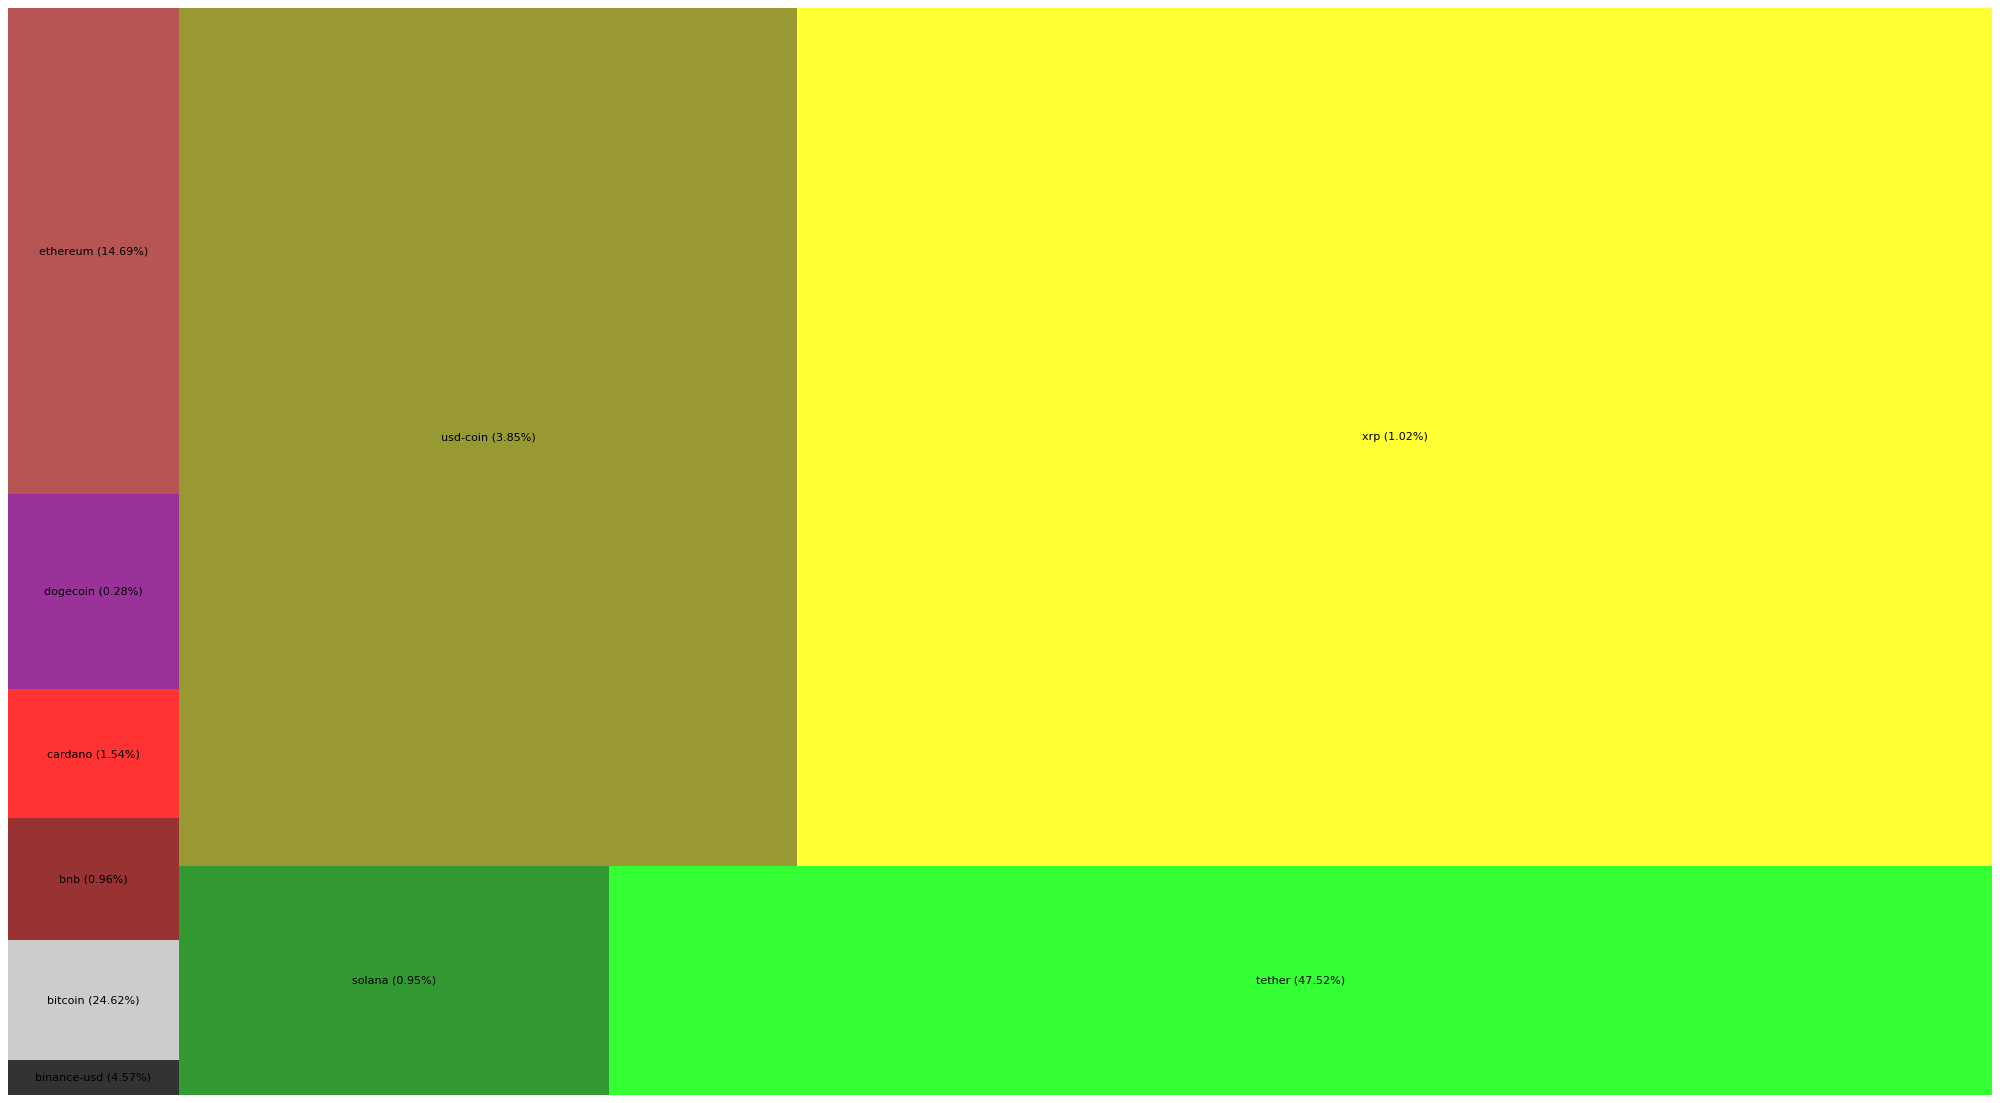

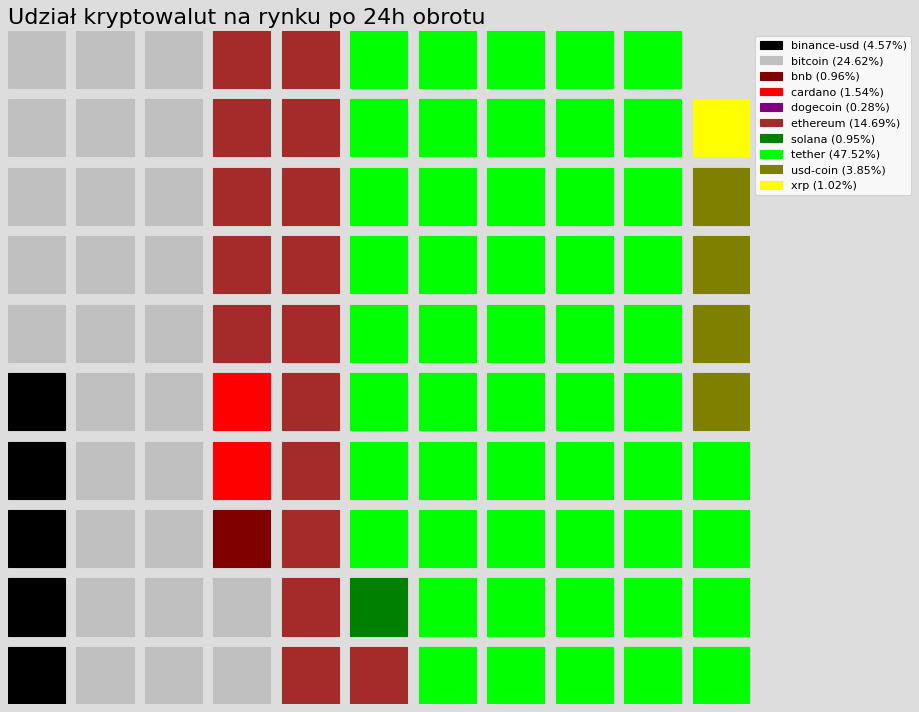

In [3]:
data=readData()
makeGraph(data)

In [4]:
import ipywidgets as widgets
import datetime
import pandas as pd
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML

In [5]:
print("Historyczne wykresy:")

Historyczne wykresy:


In [6]:
#we are going to start with importante imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')
#for graphs
import matplotlib.dates as mdates

In [7]:
import plotly.express as px
from plotly import graph_objects as go
def getDataFromFile():
    columnList=["Currency","Date","Volume","High"]
    CoinData= pd.read_csv('consolidated_coin_data.csv',usecols=columnList)
    return CoinData
def getDataFromDate(source,dateOfVis):
    #konwertujemy na odpowiedzi typ danych do porownania
    source['Date']=pd.to_datetime(source['Date'])
    dateOfVis1=datetime.strptime(dateOfVis, "%d/%m/%Y")
    filter=source.query('Date >= @dateOfVis and Date <= @dateOfVis')
    return filter
def makeGraphFromDate(filtered,dzien):
    colors=["black", "silver", "maroon", "red", "purple", "brown", "green", "lime", "olive", "yellow",'forestgreen','indigo','orange','lime']
    dataPlot={}
    sizes=[]
    curr=filtered["Currency"].tolist()
    date=filtered["Date"].tolist()
    vol=(filtered["Volume"].replace(',', '')).tolist()
    high=(filtered["High"].replace(',', '')).tolist()
    for index,row in filtered.iterrows():
        name=str(row["Currency"])
        volume=float(row['Volume'].replace(',', ''))
        sizes.append(volume)
        dataPlot.update({name: volume})
    tuples=[v for v,k in dataPlot.items()]
    n=len(dataPlot)
    colors=colors[:n]
    fig=go.Figure(go.Funnelarea(values=sizes,text=tuples,labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],title=
            'Udział kryptowalut na rynku po 24h obrotu w dniu: %s'%(dzien)))
    fig.show()
    fig=plt.figure(
                figsize=(16,9), dpi=80,alpha=.8,
        FigureClass=Waffle,
        rows=20,
        columns=30,
        values=dataPlot,
        colors=colors,
        rounding_rule='nearest',
        plot_anchor='S', icon_size=50,
        title={
            'label': 'Udział kryptowalut na rynku po 24h obrotu w dniu: %s'%(dzien),
            'loc': 'left',
            'fontdict': {
                'fontsize': 20
            }
        },
        labels=[f"{k} ({round(v / sum(dataPlot.values()) * 100,2)}%)" for k, v in dataPlot.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
    )
    plt.show()
    labels = [f"{k} ({round(v / sum(dataPlot.values()) * 100, 2)}%)" for k, v in dataPlot.items()]
    plt.figure(figsize=(32, 18), dpi=80)
    squarify.plot(sizes, label=labels,alpha=.8,color=colors)

In [8]:
print("Teraz pokażemy jak zmieniało się to w czasie:")
source=getDataFromFile()

Teraz pokażemy jak zmieniało się to w czasie:


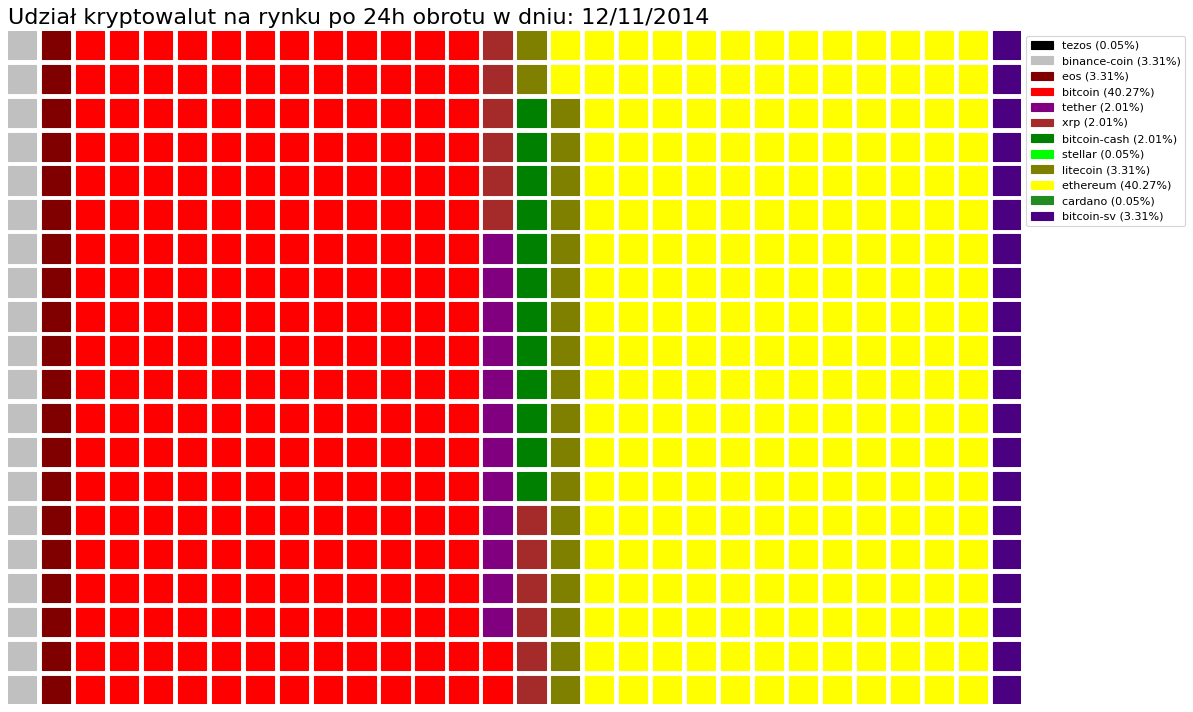

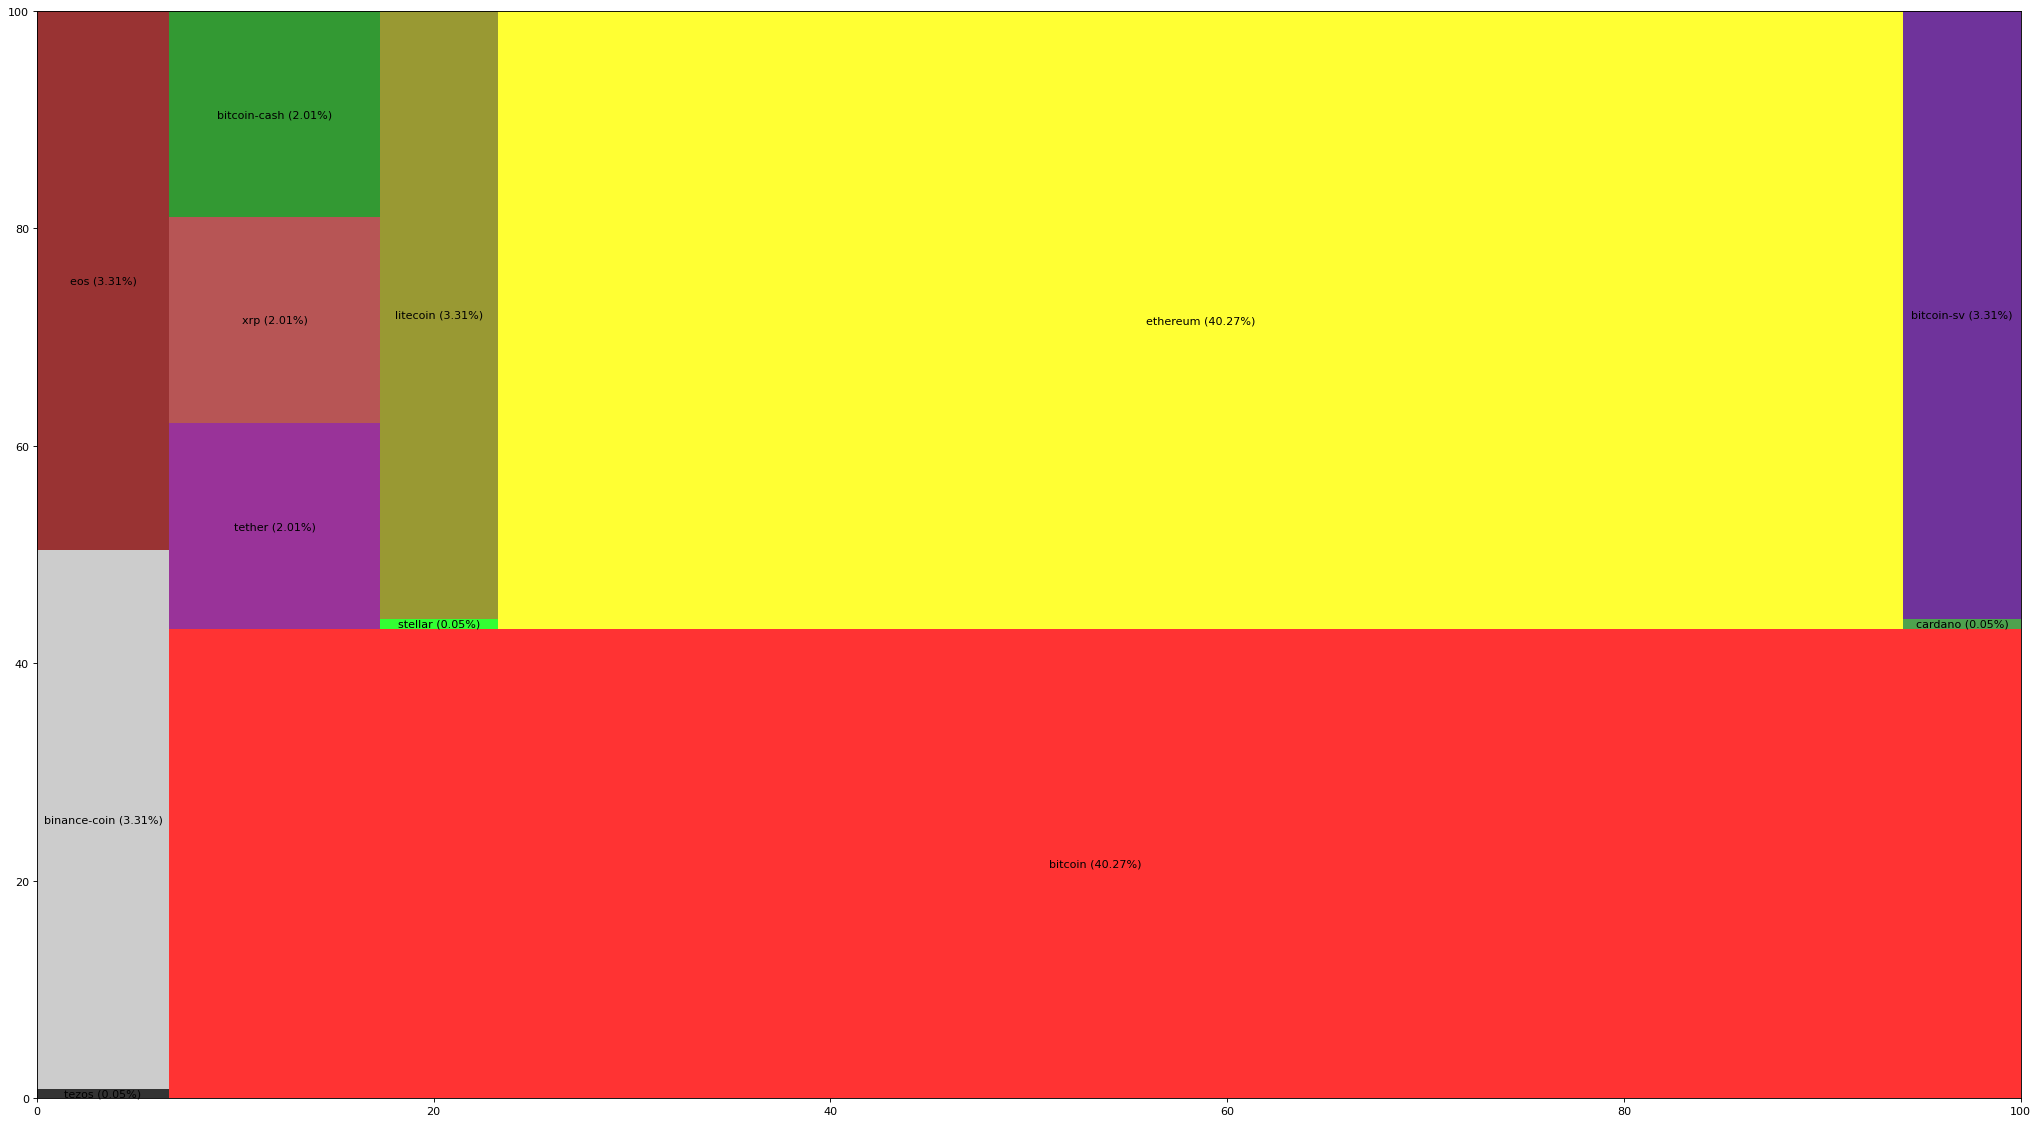

In [9]:
dzien="12/11/2014"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

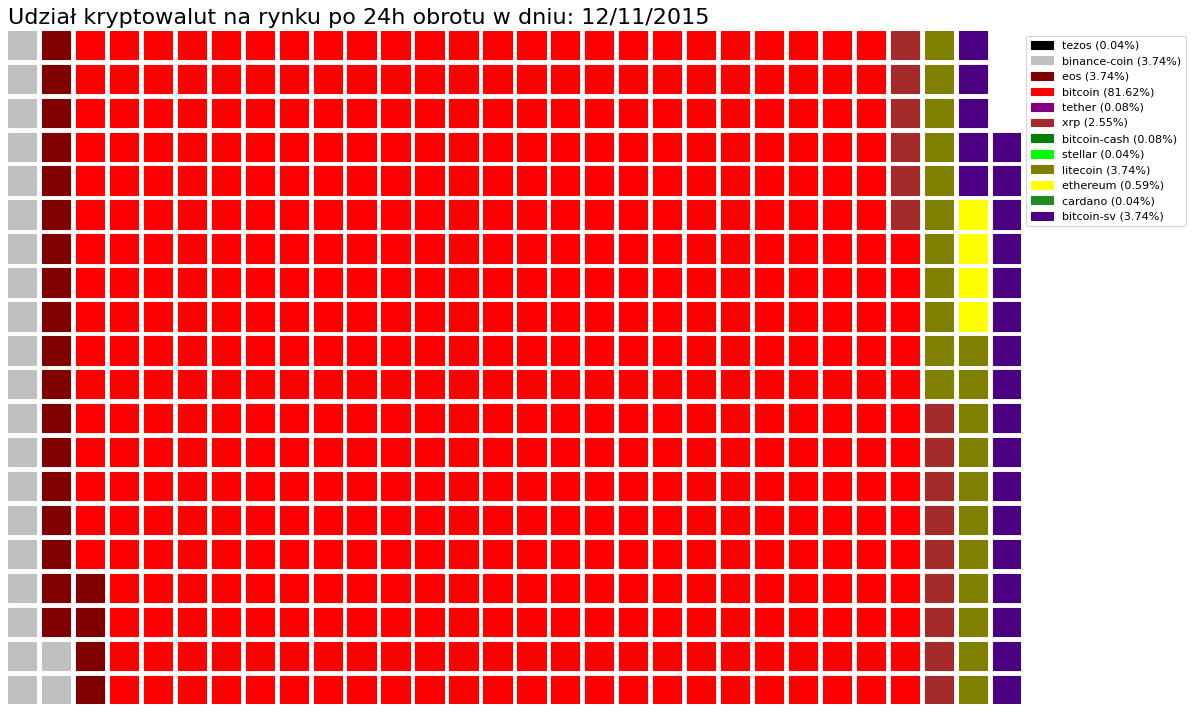

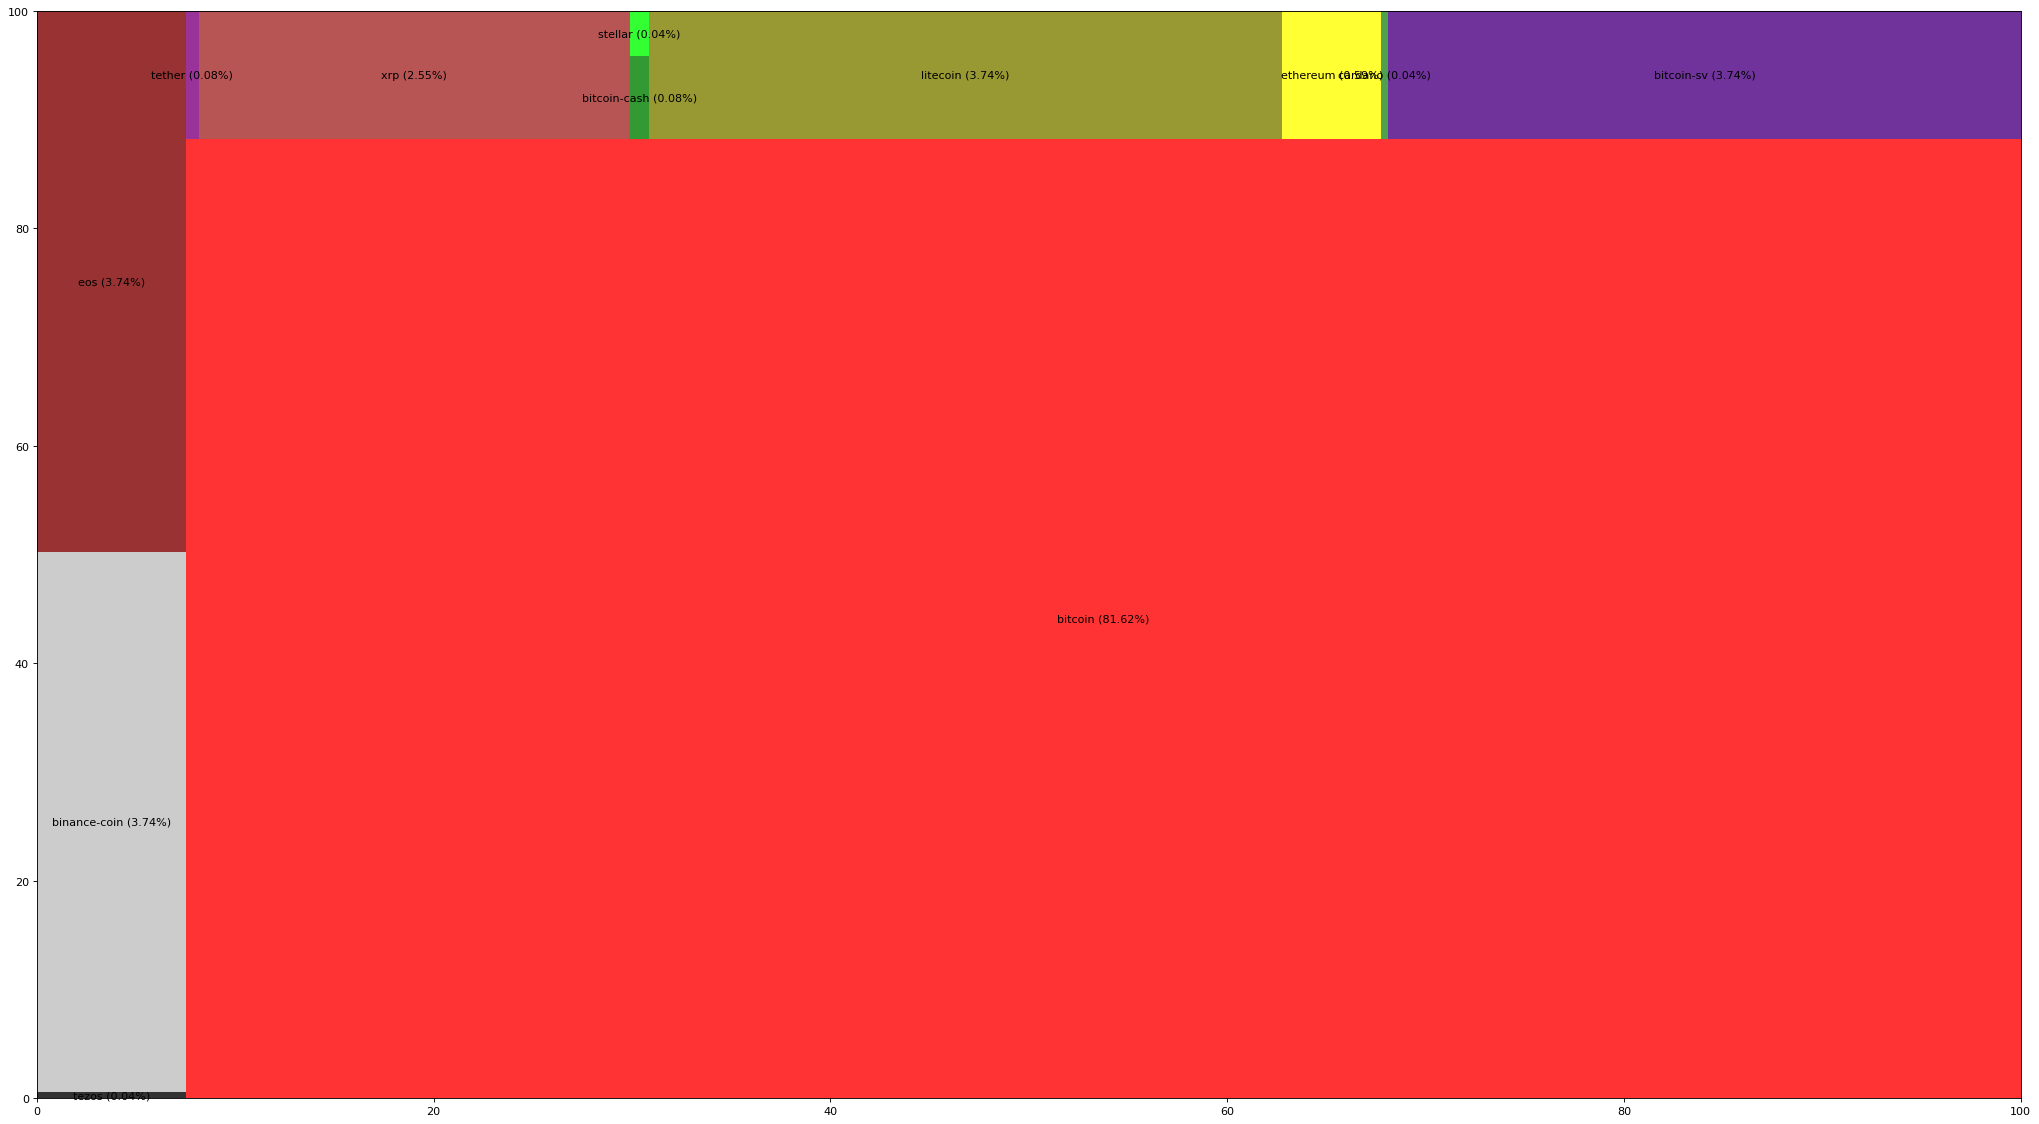

In [10]:
dzien="12/11/2015"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

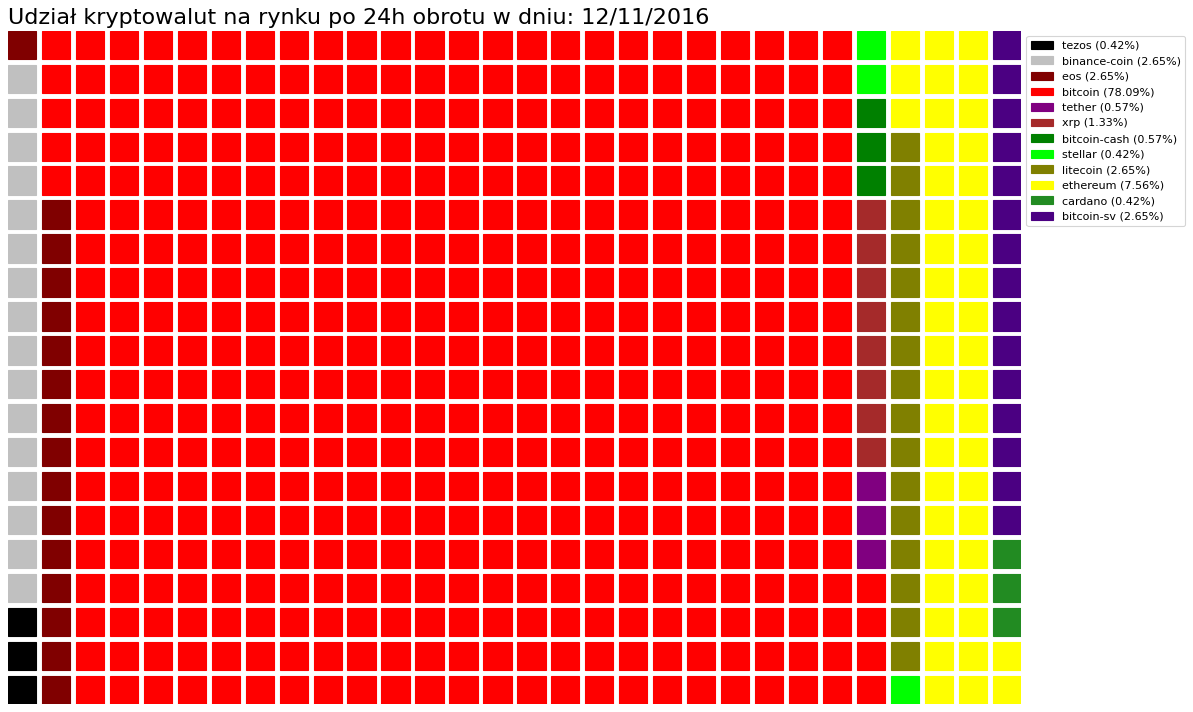

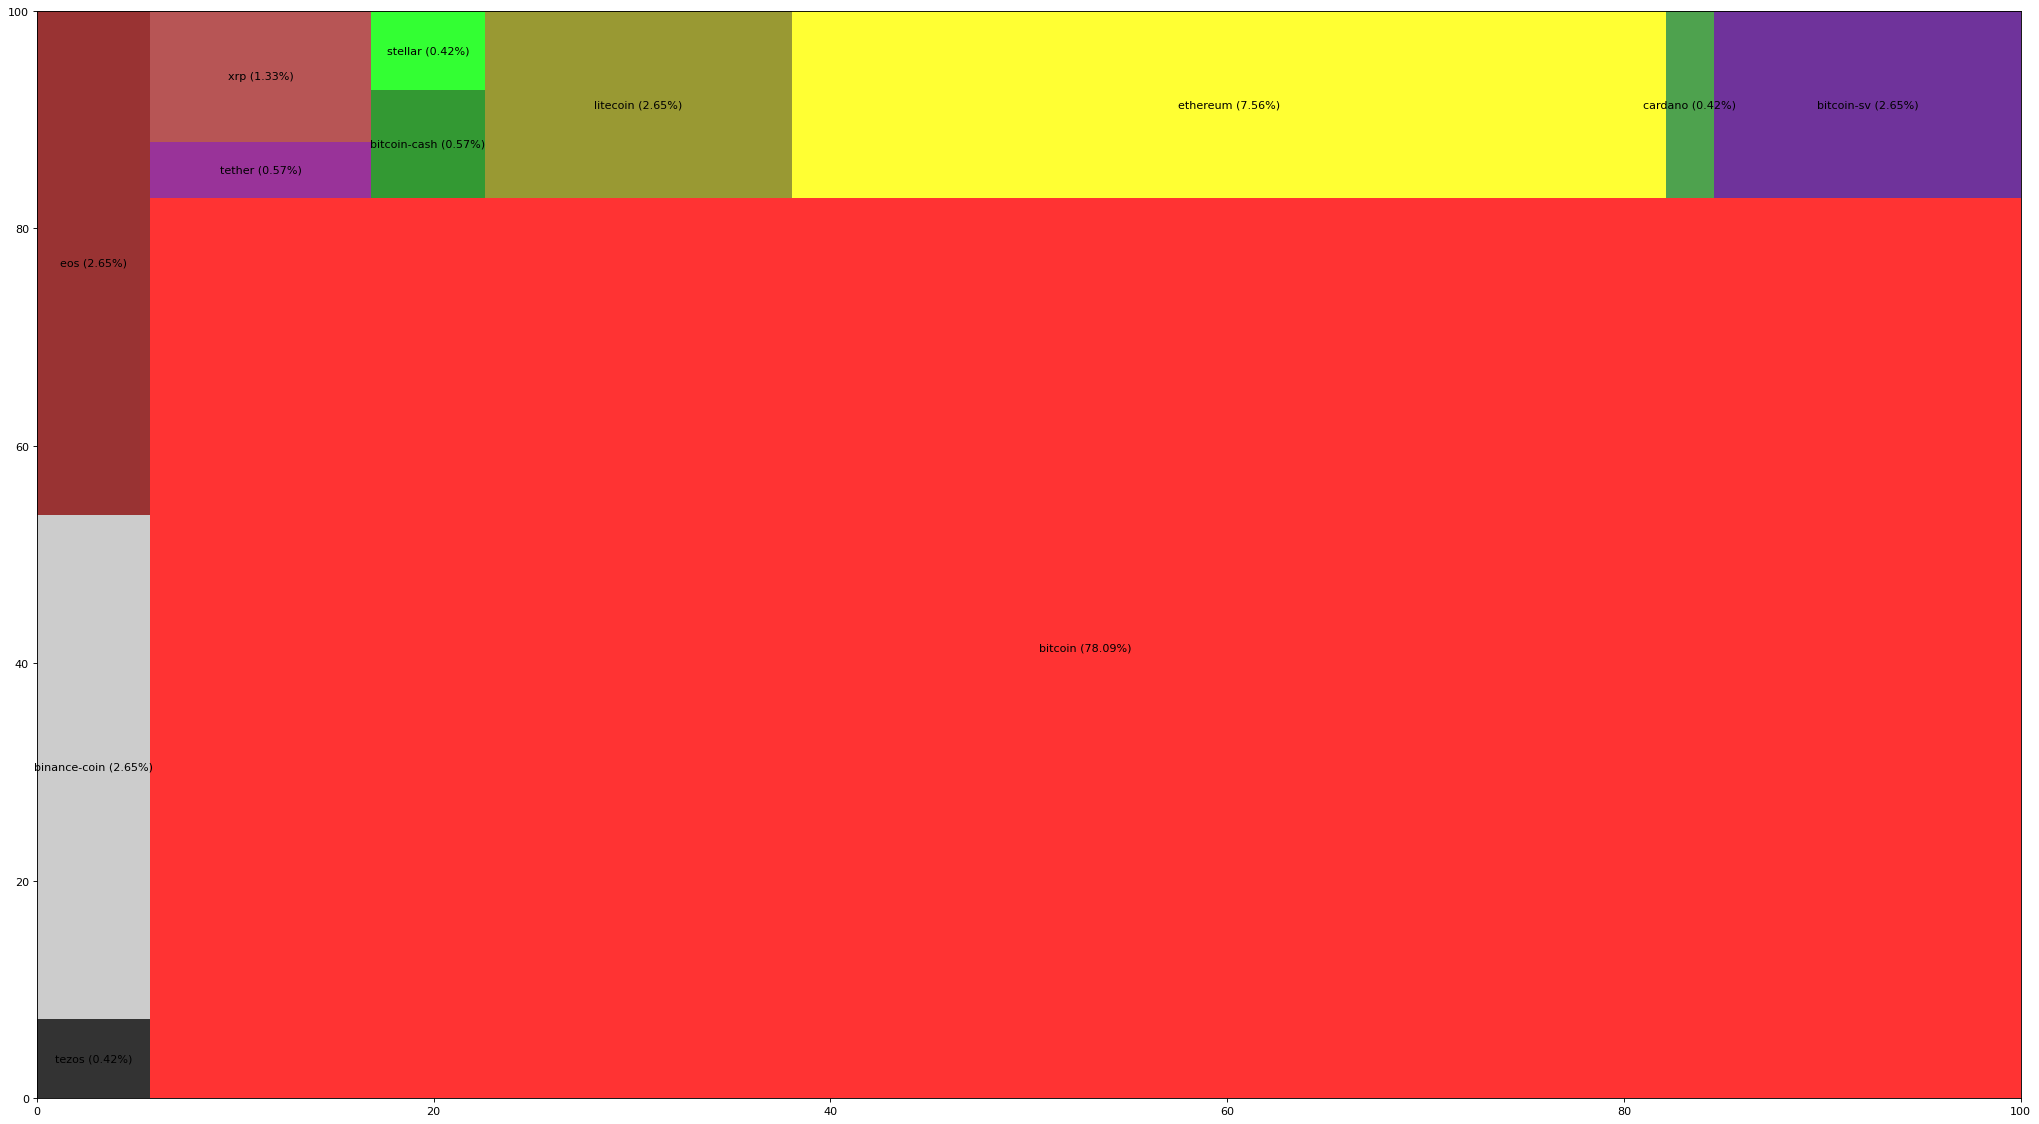

In [11]:
dzien="12/11/2016"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

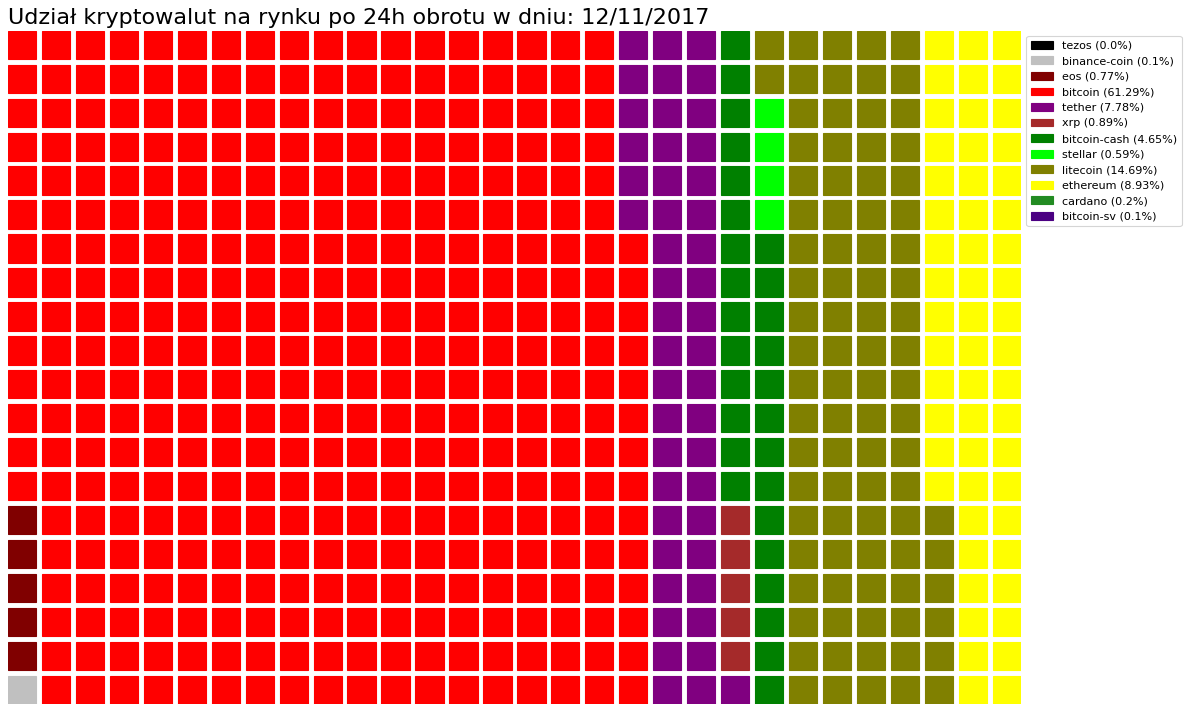

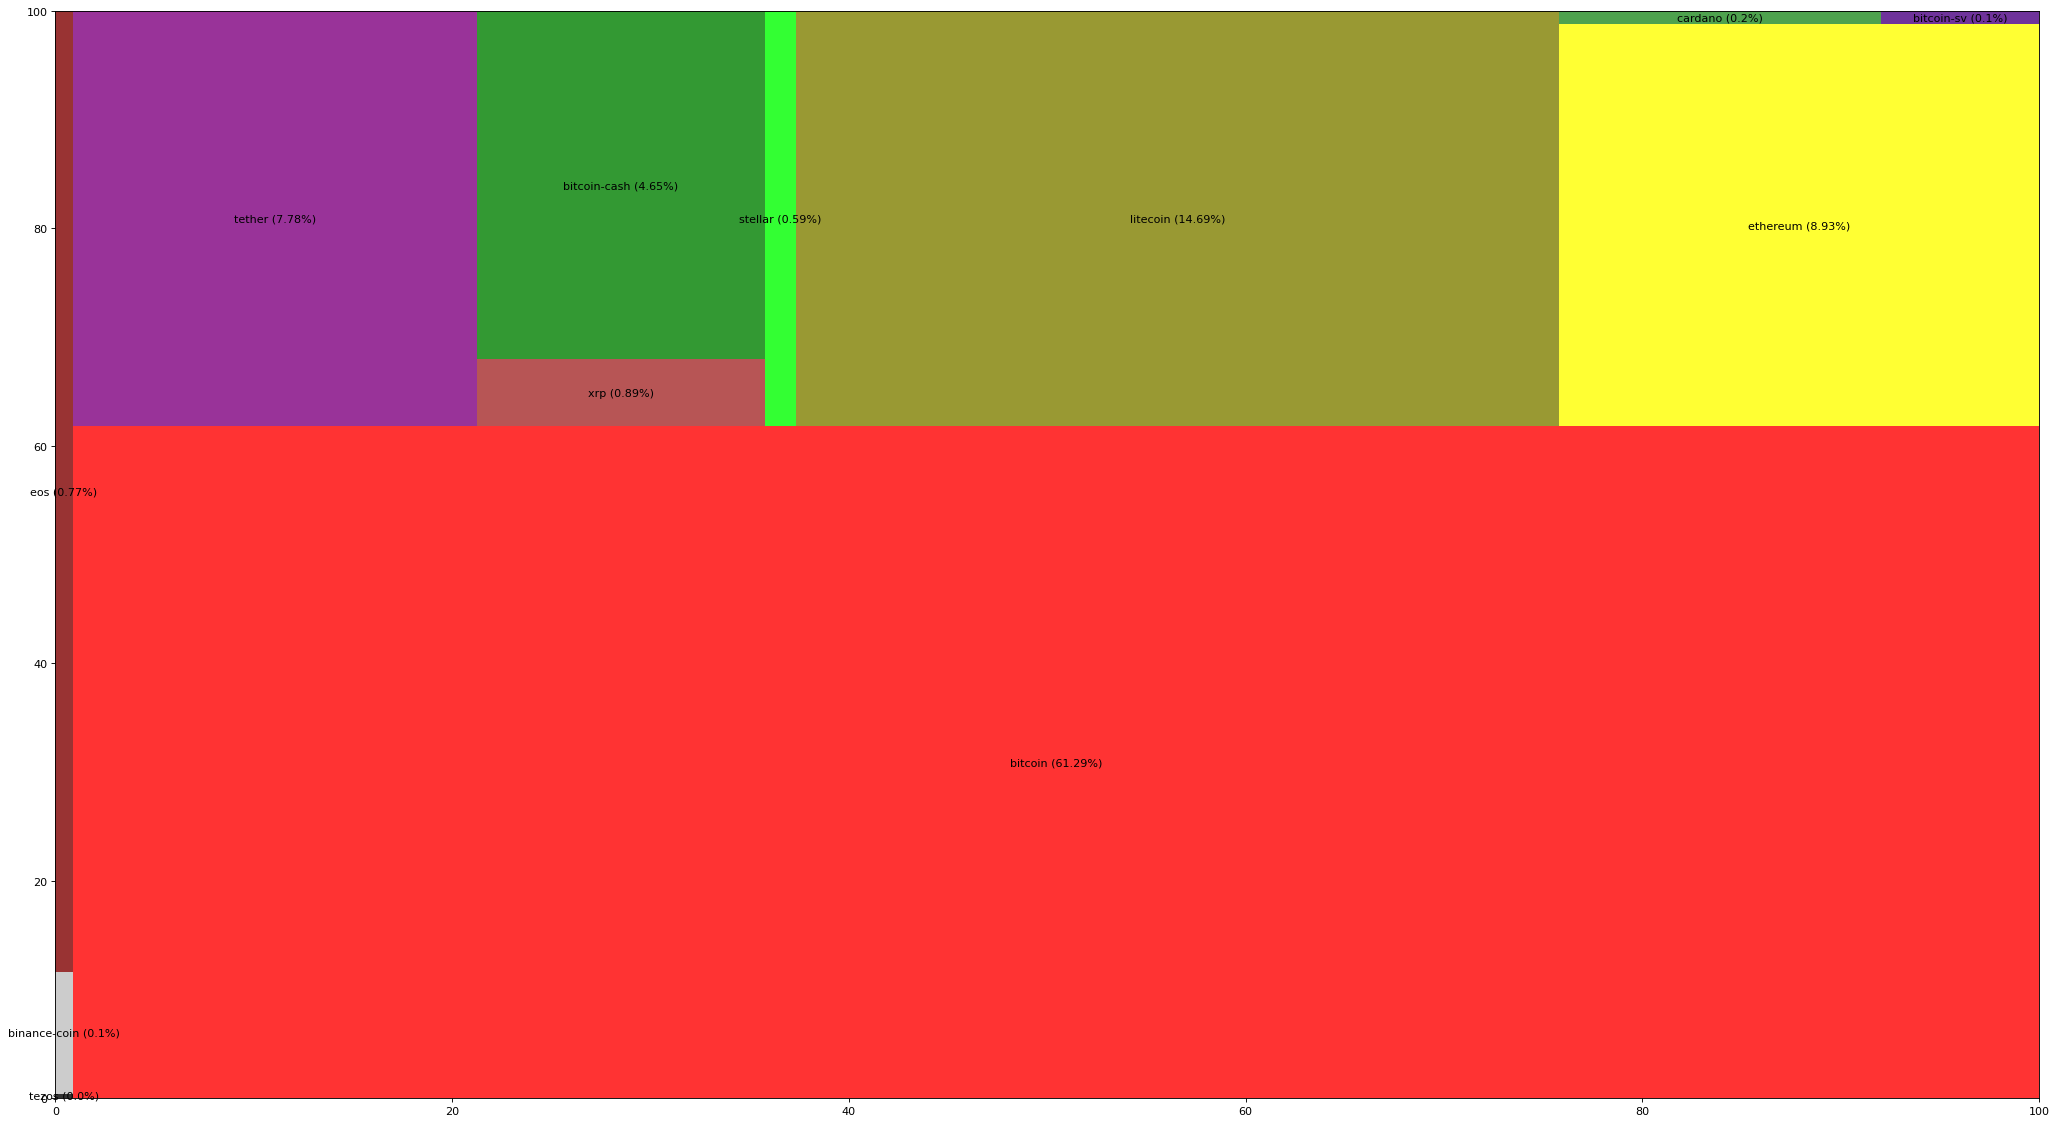

In [12]:
dzien="12/11/2017"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)

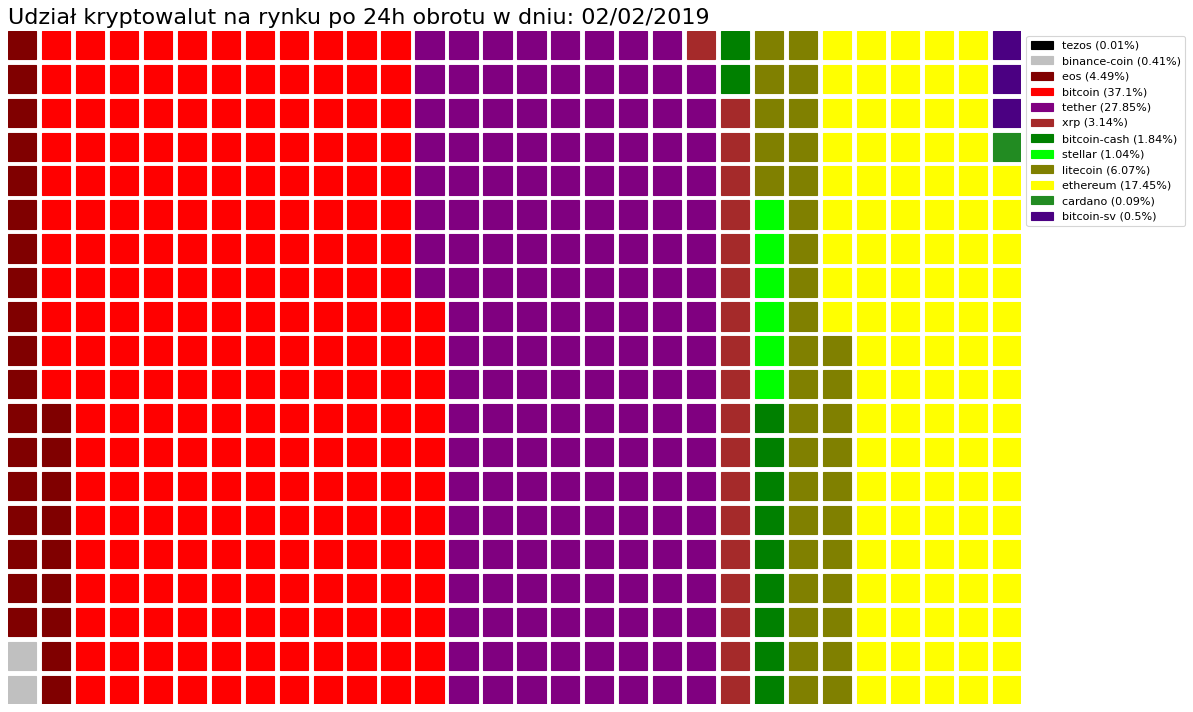

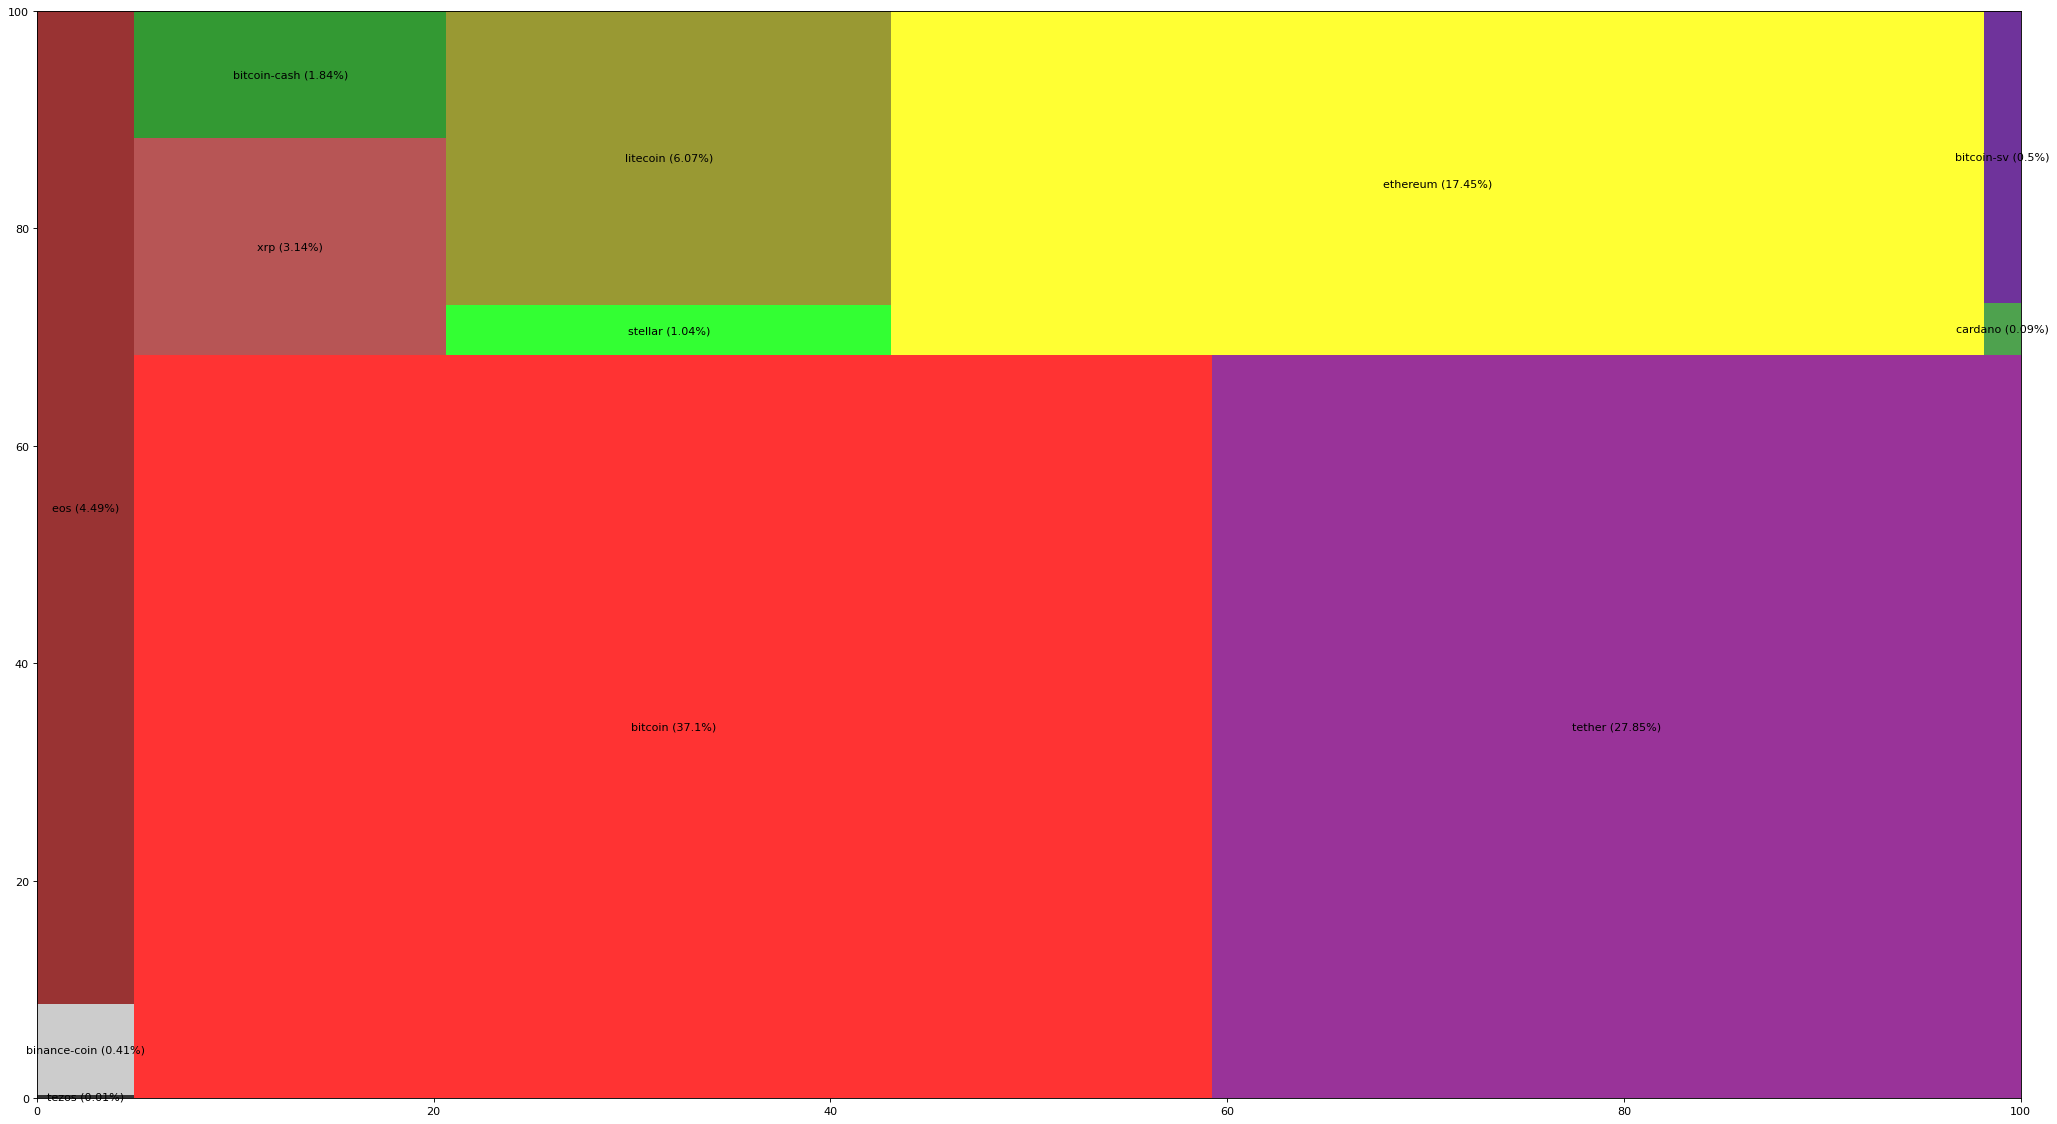

In [13]:
dzien="02/02/2019"
filtered=getDataFromDate(source,dzien)
makeGraphFromDate(filtered,dzien)